In [76]:
#import important libraries
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df = pd.read_csv("new_clean_seeds.csv")  #read the seeds data csv

df.dropna(inplace=True)  # drops missing rows with missing values


In [78]:
X = df[['temperature', 'soil_temperature', 'soil_moisture', 'precipitation', 'sunshine_duration', 'humid']]
#store imp columns into X

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
#scaling the X data --> mean 0 & standard deviation 1

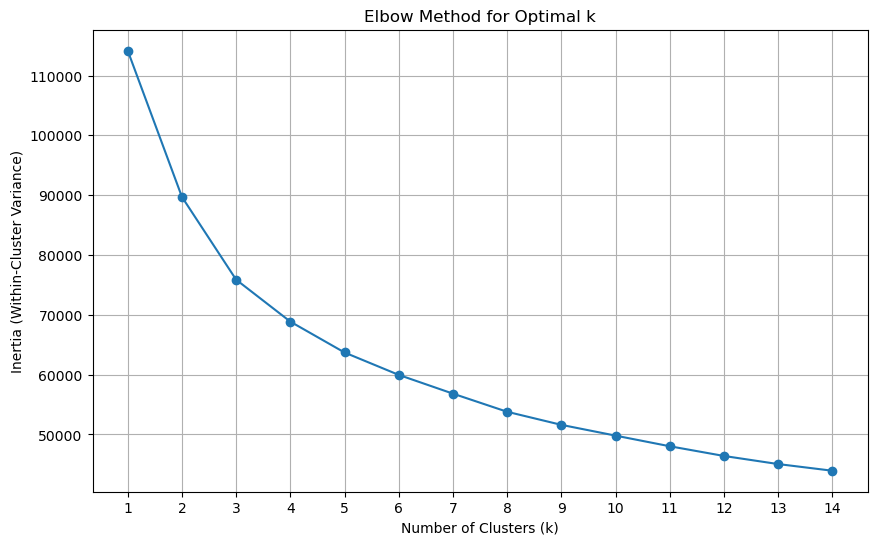

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# finding optinal k value
inertia = []
k_range = range(1, 15)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid()
plt.show()

In [65]:
print(len(X_scaled))     
print(len(df))           # checks the size of X_scaled and df

19025
19025


In [66]:
optimal_k = 4 

# Train K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Assign cluster labels to your data
df['cluster'] = kmeans.labels_

In [67]:
# Check cluster sizes
print(df['cluster'].value_counts())

# Analyze feature means per cluster
cluster_summary = df.groupby('cluster')[X.columns].mean()
print(cluster_summary)

cluster
3    5721
1    5443
0    4036
2    3825
Name: count, dtype: int64
         temperature  soil_temperature  soil_moisture  precipitation  \
cluster                                                                
0          24.136026         20.446110       0.249637     601.107532   
1          17.540694         16.162227       0.344320     743.773654   
2          24.573987         24.157516       0.337545    1064.593464   
3          19.950883         17.120171       0.268701     561.817864   

         sunshine_duration      humid  
cluster                                
0             35706.826065  62.789891  
1             22696.208708  70.807459  
2             20314.401307  74.909281  
3             16120.751792  61.825205  


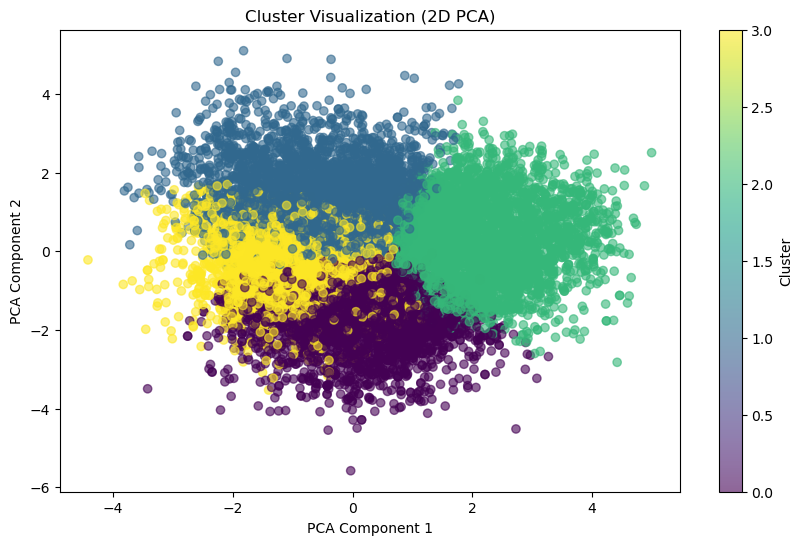

In [68]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization (2D PCA)')
plt.colorbar(label='Cluster')
plt.show()

In [69]:
new_data = [[25, 18, 0.6, 50, 8, 70]] 

# Scale the api data
new_data_scaled = scaler.transform(new_data)

# Predict the cluster
cluster_id = kmeans.predict(new_data_scaled)[0]

# Recommend seeds in this cluster
recommended_seeds = df[df['cluster'] == cluster_id]['seed_id'].tolist()

# Show count and seeds
print(f"Cluster ID: {cluster_id}")
print(f"Recommended {len(recommended_seeds)} seed(s):")
print(recommended_seeds)


Cluster ID: 1
Recommended 5443 seed(s):
[1, 8, 9, 12, 16, 28, 31, 32, 40, 43, 57, 59, 73, 74, 75, 78, 80, 81, 84, 87, 88, 89, 92, 93, 94, 96, 99, 137, 138, 146, 148, 153, 155, 164, 166, 173, 176, 180, 183, 184, 185, 187, 189, 190, 192, 203, 207, 208, 209, 213, 218, 219, 222, 223, 225, 226, 230, 231, 232, 236, 238, 243, 244, 245, 246, 247, 250, 258, 261, 262, 264, 269, 270, 276, 277, 278, 279, 280, 281, 283, 284, 286, 287, 288, 298, 300, 308, 310, 314, 316, 317, 321, 324, 330, 331, 332, 335, 340, 342, 343, 348, 350, 354, 355, 358, 359, 364, 365, 370, 372, 375, 380, 383, 384, 387, 389, 393, 394, 395, 397, 398, 399, 400, 401, 405, 411, 417, 419, 420, 421, 425, 427, 436, 445, 446, 447, 448, 454, 458, 459, 464, 467, 475, 479, 480, 482, 484, 485, 489, 495, 503, 504, 506, 507, 508, 509, 518, 519, 522, 524, 526, 527, 532, 533, 534, 539, 546, 549, 551, 553, 556, 557, 558, 559, 563, 564, 565, 566, 568, 570, 573, 575, 576, 578, 582, 588, 589, 590, 594, 598, 601, 603, 606, 614, 615, 618, 619, 624,

C:\Users\shado\anaconda3\envs\gripai\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


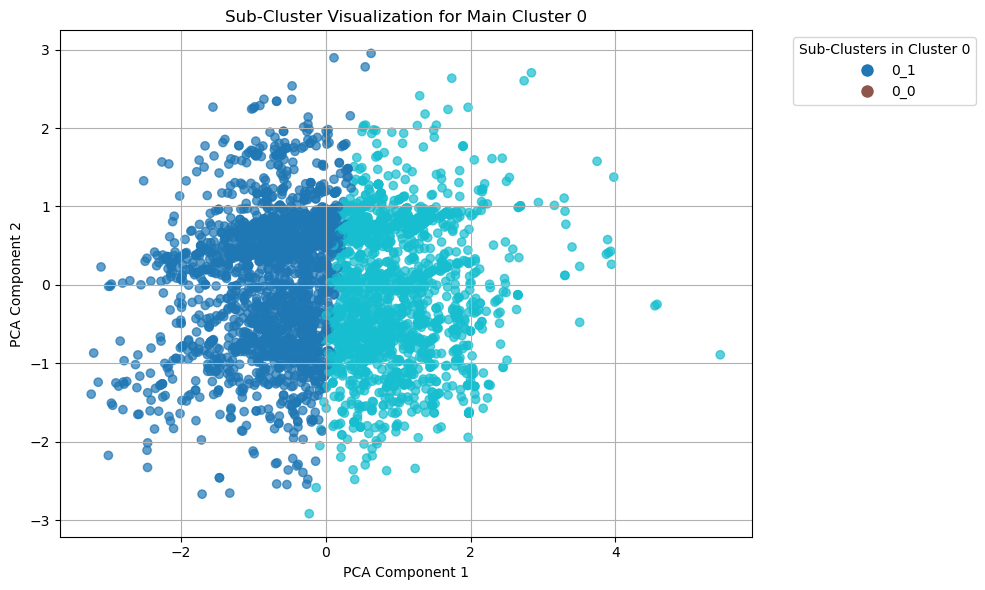

In [83]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # STEP 1: Load data and apply initial scaling
# df = pd.read_csv("new_clean_seeds.csv")
# df.dropna(inplace=True)

X = ['temperature', 'soil_temperature', 'soil_moisture', 'precipitation', 'sunshine_duration', 'humid']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[X])

# STEP 2: Train the main KMeans model (you already did this earlier)
# main_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# df['cluster'] = kmeans.fit_predict(X_scaled)

def find_best_k(X, k_min=2, k_max=5):
    best_score = -1
    best_k = k_min
    for k in range(k_min, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_k = k
    return best_k

# STEP 4: Create sub-clusters within each main cluster
df['sub_cluster'] = None

for main_cluster in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == main_cluster]
    X_cluster = scaler.transform(cluster_data[X])
    
    best_k = find_best_k(X_cluster, k_min=2, k_max=3)  # Limit to max 3 sub-clusters as you wanted
    sub_kmeans = KMeans(n_clusters=best_k, random_state=42)
    sub_labels = sub_kmeans.fit_predict(X_cluster)
    
    # Assign sub-cluster labels like '0_0', '0_1', etc.
    df.loc[df['cluster'] == main_cluster, 'sub_cluster'] = [f"{main_cluster}_{label}" for label in sub_labels]

# STEP 5: Function to visualize sub-clusters for a selected main cluster
def visualize_subclusters_for_main_cluster(cluster_id):
    cluster_df = df[df['cluster'] == cluster_id]
    X_cluster = scaler.transform(cluster_df[X])
    
    # PCA to 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_cluster)

    # Map sub-cluster labels to color codes
    unique_subs = cluster_df['sub_cluster'].unique()
    color_map = {label: idx for idx, label in enumerate(unique_subs)}
    colors = cluster_df['sub_cluster'].map(color_map)

    # Plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, cmap='tab10', alpha=0.7)

    # Legend
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=plt.cm.tab10(idx/len(unique_subs)), markersize=10)
               for idx in range(len(unique_subs))]
    plt.legend(handles, unique_subs, title=f"Sub-Clusters in Cluster {cluster_id}", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'Sub-Cluster Visualization for Main Cluster {cluster_id}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# STEP 6: To visualize sub-clusters for any cluster (example: cluster 0)
visualize_subclusters_for_main_cluster(0)  # Change 0 to 1, 2, or 3 as needed


In [84]:
# Store all sub-KMeans models in a dictionary
sub_kmeans_models = {}

for main_cluster in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == main_cluster]
    X_cluster = scaler.transform(cluster_data[features])
    
    best_k = find_best_k(X_cluster, k_min=2, k_max=3)
    sub_kmeans = KMeans(n_clusters=best_k, random_state=42)
    sub_labels = sub_kmeans.fit_predict(X_cluster)

    df.loc[df['cluster'] == main_cluster, 'sub_cluster'] = [f"{main_cluster}_{label}" for label in sub_labels]
    
    # Save the model for future use
    sub_kmeans_models[main_cluster] = sub_kmeans


In [85]:
import ast

# Ensure that 'growing_countries' is a real list (not a string)
df['growing_countries'] = df['growing_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [114]:
def predict_subcluster(new_data, country=None):
    """
    new_data: List of one row with features
    country: Optional string to filter seeds based on growing_countries list
    Returns: sub_cluster_label, mapped_cluster_int, recommended_seeds
    """
    # Scale the input
    new_scaled = scaler.transform([new_data])
    
    # Predict main cluster
    main_cluster_id = main_kmeans.predict(new_scaled)[0]  # Fixed the 'kmeans' to 'main_kmeans'
    
    # Predict sub-cluster
    sub_model = sub_kmeans_models[main_cluster_id]
    sub_cluster_id = sub_model.predict(new_scaled)[0]
    
    # Format the label
    full_sub_label = f"{main_cluster_id}_{sub_cluster_id}"
    
    # Map to int
    subcluster_map = {
        '0_0': 1, '0_1': 2,
        '1_0': 3, '1_1': 4,
        '2_0': 5, '2_1': 6,
        '3_0': 7, '3_1': 8,
    }
    mapped_cluster_int = subcluster_map.get(full_sub_label, -1)  # Use -1 if it's not in the map
    
    # Filter seeds by sub-cluster
    seeds_in_subcluster = df[df['sub_cluster'] == full_sub_label]

    if country:
        print(f"Filtering seeds for country: {country}")
        seeds_in_subcluster = seeds_in_subcluster[seeds_in_subcluster['growing_countries'].apply(
            lambda countries: any(country.lower() == c.lower() for c in countries)
        )]
        print(f"Seeds after filtering by country: {seeds_in_subcluster.shape[0]}")

    # Prepare recommendations
    recommended_seeds = seeds_in_subcluster['seed_id'].tolist()
    
    return full_sub_label, mapped_cluster_int, recommended_seeds


In [115]:
# sub_cluster_label, seeds = predict_subcluster(new_data)
# print(f"Sub-cluster: {sub_cluster_label}, {len(seeds)} seed(s) found without country filter.")


In [116]:
# Example new data (temperature, soil_temperature, etc.)
user_country = "pakistan"

new_data = [20, 15, 0.2, 800, 22000, 60]

sub_cluster_label, cluster_int, seeds = predict_subcluster(new_data, country=user_country)
print(f"New data belongs to sub-cluster: {sub_cluster_label}")

print(f"Recommended Seeds: {len(seeds)}")
print(seeds)


Filtering seeds for country: pakistan
Seeds after filtering by country: 856
New data belongs to sub-cluster: 3_1
Recommended Seeds: 856
[13, 22, 37, 58, 65, 91, 95, 114, 122, 178, 320, 334, 353, 377, 408, 491, 492, 523, 530, 538, 552, 599, 602, 605, 626, 628, 644, 646, 653, 676, 686, 695, 703, 770, 780, 788, 837, 841, 842, 843, 880, 905, 924, 935, 947, 948, 963, 992, 1014, 1017, 1018, 1023, 1032, 1039, 1041, 1084, 1089, 1093, 1139, 1174, 1223, 1235, 1272, 1294, 1308, 1316, 1339, 1348, 1379, 1383, 1395, 1402, 1403, 1405, 1448, 1493, 1507, 1519, 1559, 1561, 1562, 1652, 1661, 1672, 1674, 1737, 1758, 1761, 1768, 1804, 1817, 1837, 1860, 1868, 1911, 1923, 1950, 1954, 1964, 1981, 2050, 2051, 2074, 2077, 2088, 2117, 2121, 2153, 2179, 2198, 2228, 2234, 2261, 2263, 2289, 2304, 2377, 2418, 2421, 2430, 2439, 2450, 2493, 2503, 2513, 2544, 2561, 2574, 2595, 2626, 2651, 2657, 2712, 2752, 2762, 2770, 2773, 2787, 2804, 2809, 2812, 2826, 2827, 2834, 2883, 2927, 2943, 2957, 2980, 2990, 2999, 3048, 3050, 

C:\Users\shado\anaconda3\envs\gripai\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [117]:
df[df['sub_cluster'] == sub_cluster_label]['growing_countries'].head(10)


3                      [California, Oregon, Washington]
4                       [United States, Canada, Mexico]
9                                              [Mexico]
11    [Antigua and Barbuda, Bahamas, Barbados, Beliz...
14                         [Texas, Oklahoma, Louisiana]
18    [Antigua and Barbuda, Bahamas, Barbados, Beliz...
20                     [California, Oregon, Washington]
28    [Antigua and Barbuda, Bahamas, Barbados, Beliz...
40    [United States, Argentina, Brazil, Russia, Aus...
41    [United States, Mexico, Australia, Brazil, Sou...
Name: growing_countries, dtype: object

In [118]:
print(df['sub_cluster'].nunique())


8


In [119]:
print(df['sub_cluster'].unique())


['1_1' '0_1' '3_0' '3_1' '2_1' '0_0' '1_0' '2_0']


In [120]:
import joblib

# Save the main scaler
joblib.dump(scaler, 'models/scaler.joblib')

# Save the main kmeans model
joblib.dump(main_kmeans, 'models/main_kmeans.joblib')

# Save each sub-kmeans model in a dict
joblib.dump(sub_kmeans_models, 'models/sub_kmeans_models.joblib')


['models/sub_kmeans_models.joblib']

In [ ]:
# df.to_csv('finale.csv', index=False)
